In [23]:
import matplotlib.pyplot as plt
import pandas as pd
from rdkit import Chem
from rdkit.Chem.SaltRemover import SaltRemover
from rdkit.ML.Descriptors import MoleculeDescriptors

In [ ]:
sfilename = "data/hmdb_metabolites.xml"
#hmdb_metabolites
strcount1 = 0
strcount2 = 0
# name ='None'
smiles = 'None'
# chemical_formula = 'None'
average_molecular_weight =0
endo_or_exo ='None'
flag = False
# res = open('xml处理_'+sfilename.split('.')[0]+'.txt', 'w',encoding='utf-8')
smiles_dict = {'smiles':[], 'source':[], 'MW':[]}
for line in open(sfilename,'r',encoding='utf-8'):
    line = str(line.strip('\n').strip(' '))
    #print(line)
    if line == '</metabolite>':
        flag =True
    if line == '</secondary_accessions>':
        strcount1 =1
    # if line[0:6] == '<name>' and strcount1==1:
    #     name = line[6:-7]
        #print(name)
        strcount1 =0
    # if line[0:18] == '<chemical_formula>':
    #     chemical_formula = line[18:-19]
        #print(chemical_formula)
    if line[0:26] == '<average_molecular_weight>':
        average_molecular_weight = line[26:-27]
        #print(average_molecular_weight)
    if line[0:8] == '<smiles>':
        smiles = line[8:-9]
        #print(smiles)
    if line == '<term>Source</term>':
        strcount2 =1
        continue
    if strcount2!= 0:
        strcount2+=1
    if strcount2 == 10:
        endo_or_exo = line[6:-7]
        #print(endo_or_exo)
        strcount2=0
    if flag==True:
        # smiles !=''and name !='' and chemical_formula != '' and average_molecular_weight!=0 and endo_or_exo!='':
        # res.write(smiles + '\t' + name + '\t' + chemical_formula + '\t' + str(
        #     average_molecular_weight) + '\t' + endo_or_exo + '\n')
        smiles_dict['smiles'].append(smiles)
        smiles_dict['source'].append(endo_or_exo)
        smiles_dict['MW'].append(average_molecular_weight)
        # name = 'None'
        smiles = 'None'
        # chemical_formula = 'None'
        average_molecular_weight = 0
        endo_or_exo = 'None'
        flag =False
        if len(smiles_dict['smiles'])%10000 ==0:
            print(len(smiles_dict['smiles']))



In [19]:
print(len(smiles_dict['smiles']))
df = pd.DataFrame(smiles_dict)
df['MW'] = df['MW'].apply(lambda x: float(x))
df.head(10)

217920


,smiles,source,MW
0,CN1C=NC(C[C@H](N)C(O)=O)=C1,Endogenous,169.1811
1,NCCCN,Endogenous,74.1249
2,CCC(=O)C(O)=O,Endogenous,102.0886
3,CC[C@H](O)C(O)=O,Endogenous,104.105
4,[H][C@@]12CCC(=O)[C@@]1(C)CC[C@]1([H])C3=C(CC[...,Endogenous,300.3921
5,C[C@@H](O)CC(O)=O,Endogenous,104.1045
6,OC[C@H]1O[C@H](C[C@@H]1O)N1C=CC(=O)NC1=O,Endogenous,228.202
7,NC1=NC(=O)N(C=C1)[C@H]1C[C@H](O)[C@@H](CO)O1,Endogenous,227.2172
8,[H][C@@]12CC[C@](O)(C(=O)CO)[C@@]1(C)CC[C@@]1(...,Endogenous,346.4605
9,[H][C@@]12CC[C@H](C(=O)CO)[C@@]1(C)CC[C@@]1([H...,Endogenous,330.4611


['Endogenous', 'None', 'Food', 'Biological', 'Environmental', 'Synthetic', 'Exogenous']


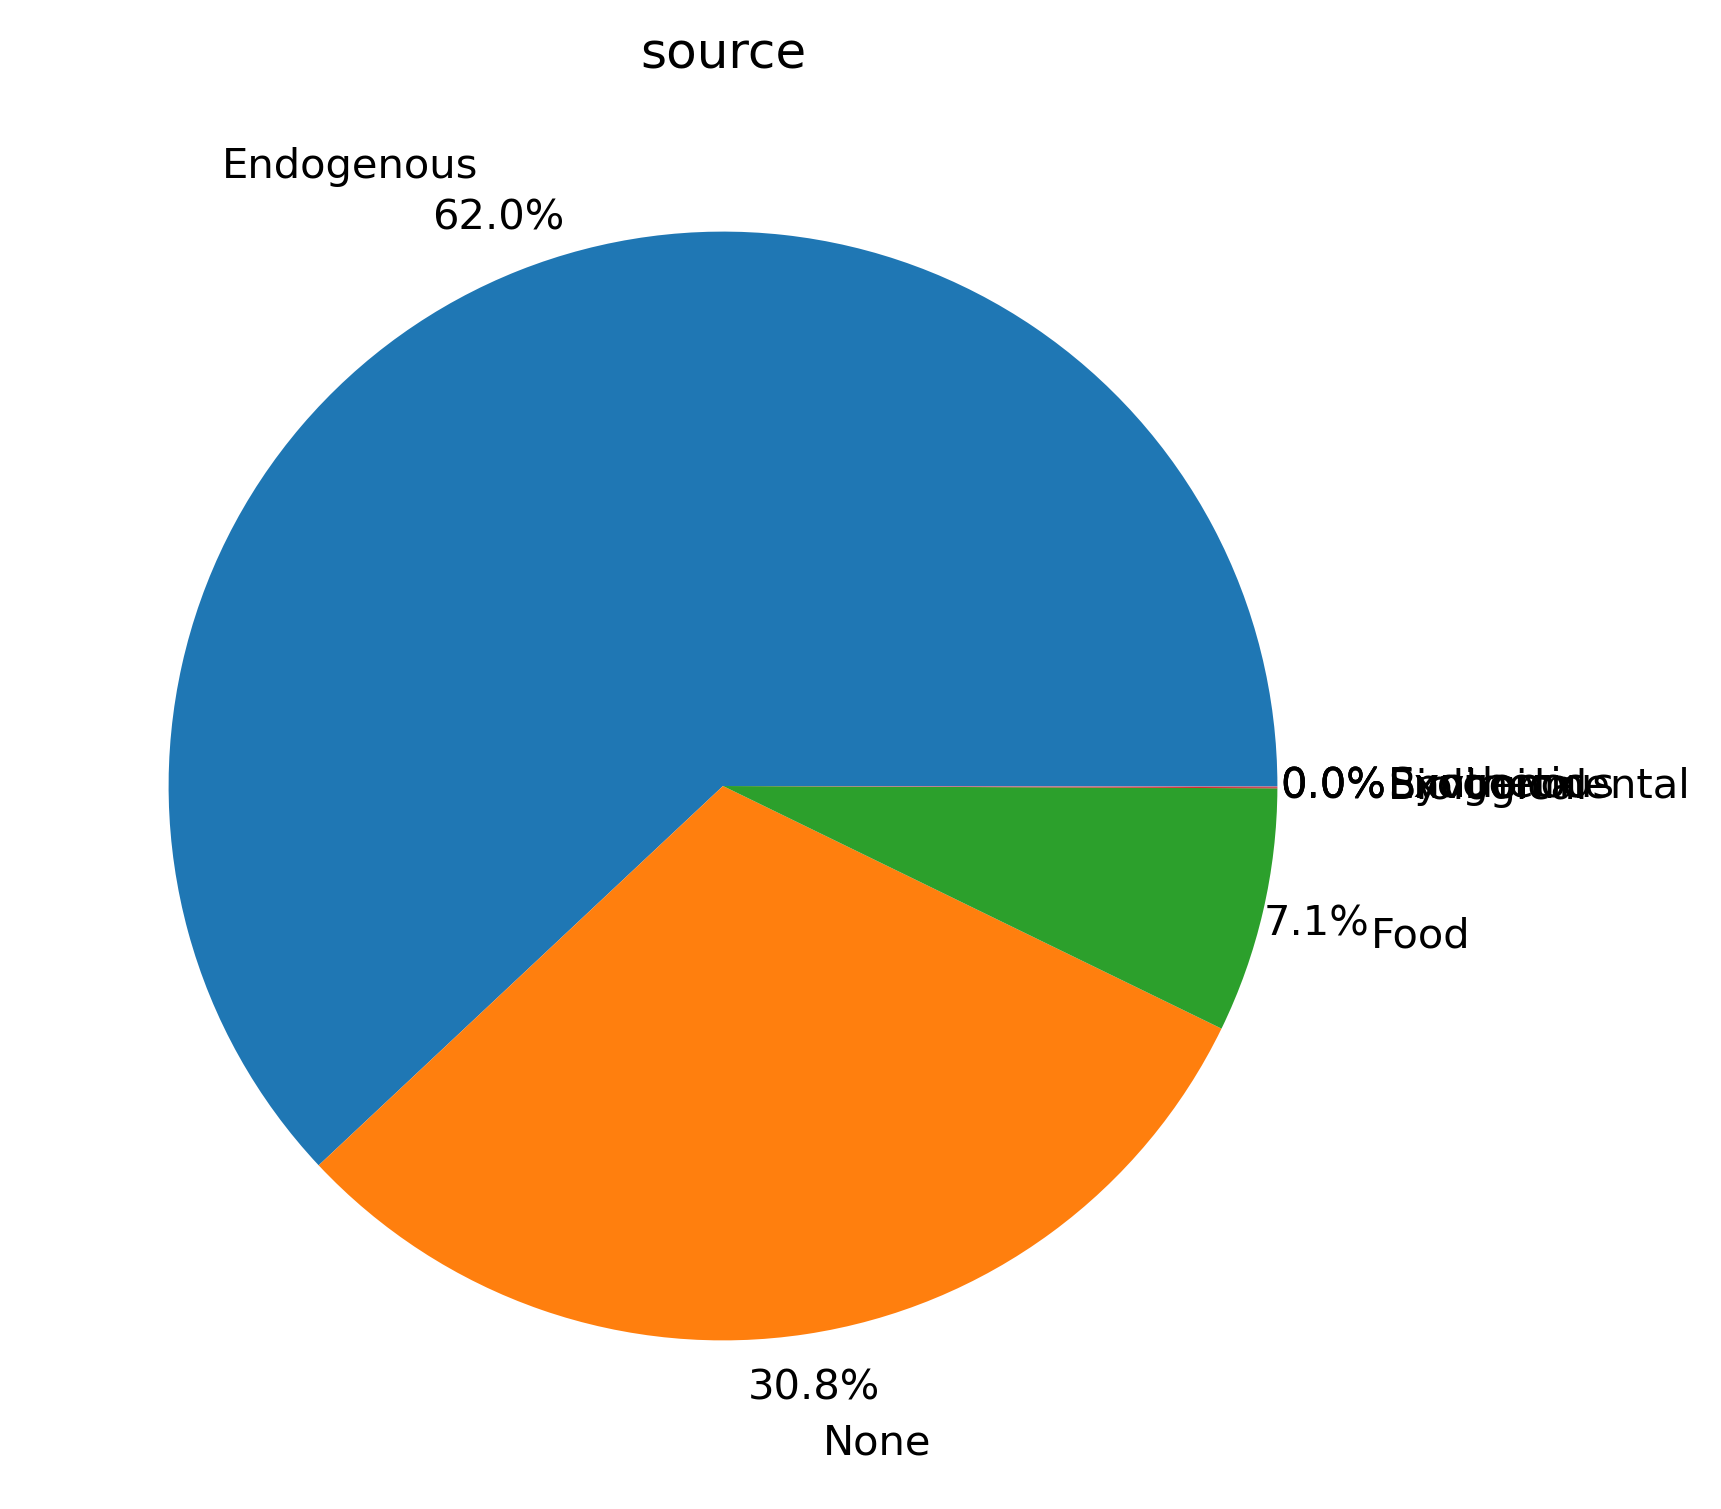

In [20]:
key = 'source'
def draw_pie(key):
        grades_labels = list(df[key].value_counts().index)
        print(grades_labels)
        grades_nums = df[key].value_counts().values
        plt.figure(figsize=(12,6),dpi=300)
        plt.pie(grades_nums, labels = grades_labels, autopct = '%1.1f%%',
        pctdistance = 1.1,labeldistance = 1.2)
        plt.title(key)
        plt.show()
draw_pie(key)

In [24]:
remover = SaltRemover()
def smi_standard(smi):
    try:
        mol = Chem.MolFromSmiles(smi)
        molnew = remover(mol, dontRemoveEverything=True)
        smi = Chem.MolToSmiles(molnew) #moltosmiles起到规范化作用
    except:
        smi = 'None'
        print('error')
    return smi
df['standard_smiles'] = df['smiles'].apply(smi_standard)

[02:17:17] Explicit valence for atom # 11 N, 4, is greater than permitted
[02:17:17] Explicit valence for atom # 1 N, 4, is greater than permitted


error
error


[02:17:18] Explicit valence for atom # 0 P, 11, is greater than permitted
[02:17:18] Explicit valence for atom # 31 N, 4, is greater than permitted
[02:17:18] Explicit valence for atom # 21 N, 4, is greater than permitted


error
error
error


[02:17:21] Explicit valence for atom # 0 N, 4, is greater than permitted


error


[02:17:22] Explicit valence for atom # 21 N, 4, is greater than permitted


error


[02:17:22] Explicit valence for atom # 1 Cl, 4, is greater than permitted


error


[02:17:23] Explicit valence for atom # 11 N, 4, is greater than permitted


error


[02:17:34] WARNING: not removing hydrogen atom without neighbors
[02:17:34] Explicit valence for atom # 6 C, 5, is greater than permitted


error


[02:18:14] SMILES Parse Error: syntax error while parsing: None
[02:18:14] SMILES Parse Error: Failed parsing SMILES 'None' for input: 'None'


error


[02:18:51] SMILES Parse Error: syntax error while parsing: None
[02:18:51] SMILES Parse Error: Failed parsing SMILES 'None' for input: 'None'


error


[02:18:56] SMILES Parse Error: syntax error while parsing: None
[02:18:56] SMILES Parse Error: Failed parsing SMILES 'None' for input: 'None'
[02:18:56] SMILES Parse Error: syntax error while parsing: None
[02:18:56] SMILES Parse Error: Failed parsing SMILES 'None' for input: 'None'


error
error


[02:18:57] SMILES Parse Error: syntax error while parsing: None
[02:18:57] SMILES Parse Error: Failed parsing SMILES 'None' for input: 'None'
[02:18:57] SMILES Parse Error: syntax error while parsing: None
[02:18:57] SMILES Parse Error: Failed parsing SMILES 'None' for input: 'None'
[02:18:57] SMILES Parse Error: syntax error while parsing: None
[02:18:57] SMILES Parse Error: Failed parsing SMILES 'None' for input: 'None'
[02:18:57] SMILES Parse Error: syntax error while parsing: None
[02:18:57] SMILES Parse Error: Failed parsing SMILES 'None' for input: 'None'
[02:18:57] SMILES Parse Error: syntax error while parsing: None
[02:18:57] SMILES Parse Error: Failed parsing SMILES 'None' for input: 'None'
[02:18:57] SMILES Parse Error: syntax error while parsing: None
[02:18:57] SMILES Parse Error: Failed parsing SMILES 'None' for input: 'None'
[02:18:57] SMILES Parse Error: syntax error while parsing: None
[02:18:57] SMILES Parse Error: Failed parsing SMILES 'None' for input: 'None'
[02:18

error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


[02:18:57] Explicit valence for atom # 18 S, 8, is greater than permitted


error


[02:18:59] SMILES Parse Error: syntax error while parsing: None
[02:18:59] SMILES Parse Error: Failed parsing SMILES 'None' for input: 'None'


error


[02:18:59] SMILES Parse Error: syntax error while parsing: None
[02:18:59] SMILES Parse Error: Failed parsing SMILES 'None' for input: 'None'


error


[02:19:01] SMILES Parse Error: syntax error while parsing: None
[02:19:01] SMILES Parse Error: Failed parsing SMILES 'None' for input: 'None'


error


[02:19:01] SMILES Parse Error: syntax error while parsing: OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1
[02:19:01] SMILES Parse Error: Failed parsing SMILES 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1' for input: 'OC1=CC=CC(=C1)C-1=C2\CCC(=N2)\C(=C2/N\C(\C=C2)=C(/C2=N/C(/C=C2)=C(\C2=CC=C\-1N2)C1=CC(O)=CC=C1)C1=CC(O)=CC=C1)\C1=CC(O)=CC=C1'


error


[02:19:21] Explicit valence for atom # 5 N, 4, is greater than permitted
[02:19:21] WARNING: not removing hydrogen atom without neighbors
[02:19:21] Explicit valence for atom # 19 N, 4, is greater than permitted


error
error


[02:19:21] Explicit valence for atom # 26 N, 4, is greater than permitted
[02:19:21] Explicit valence for atom # 46 N, 4, is greater than permitted
[02:19:21] WARNING: not removing hydrogen atom without neighbors


error
error


In [33]:
#去重
df = df.drop_duplicates('standard_smiles', keep='first')

In [34]:
#提取分子量小于1000有有效smiles格式的'', 
df_exo = df[ (df['MW']<=1000) & (df['standard_smiles'] != 'None') 
&(df['source'] != 'Endogenous') & (df['source'] != 'None')]

In [35]:
df_exo.to_csv('data/exo_small.csv')

In [ ]:
#处理毒物分子
mols = Chem.SDMolSupplier('data/toxic.sdf')
print(len(mols))
propNames = list(mols[1].GetPropNames())
print(float(mols[10].GetProp('MOLECULAR_WEIGHT'))<=1000.0)

In [ ]:
#只用分子量小于1000的
smis = []
remover = SaltRemover()
for m in range(len(mols)):
    try:
        if float(mols[m].GetProp('MOLECULAR_WEIGHT'))<=1000.0:
            molnew = remover(mols[m], dontRemoveEverything=True)
            smi = Chem.MolToSmiles(molnew) #moltosmiles起到规范化作用
            smis.append(smi)
        else:
            pass
    except:
        print('error:', mols[m])

    if m % 1000 == 0:
        print('yidu',m )

smis = set(smis)
print('all smiles num:',len(smis))
newmols = []
for smi in smis:
    newmols.append(Chem.MolFromSmiles(smi))
print('all smiles num:',len(newmols))


In [ ]:
smi_series = {'standard_smiles':list(smis)}
df_tox_smi = pd.DataFrame(smi_series)
df_tox_smi.to_csv('data/toxic_small.csv')
df_tox_smi.head()